In [1]:
#A continuación importamos las librerias que utilizaremos. 
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Latex
from matplotlib import cm
import math
from tqdm import tqdm

# Parcial 2: Métodos Computacionales
### Estudiantes: Andrés Hernández (201329363)    Francisco Díaz (201912252)

## 1. Metropolis-Hasting algorithm
**1.** a)Use el algoritmo de Metropolis-Hastings para encontrar los mejores estimadores que describen esta observación $\hat{\mu}$ y $\hat{\epsilon}$ con sus respectivos errores.

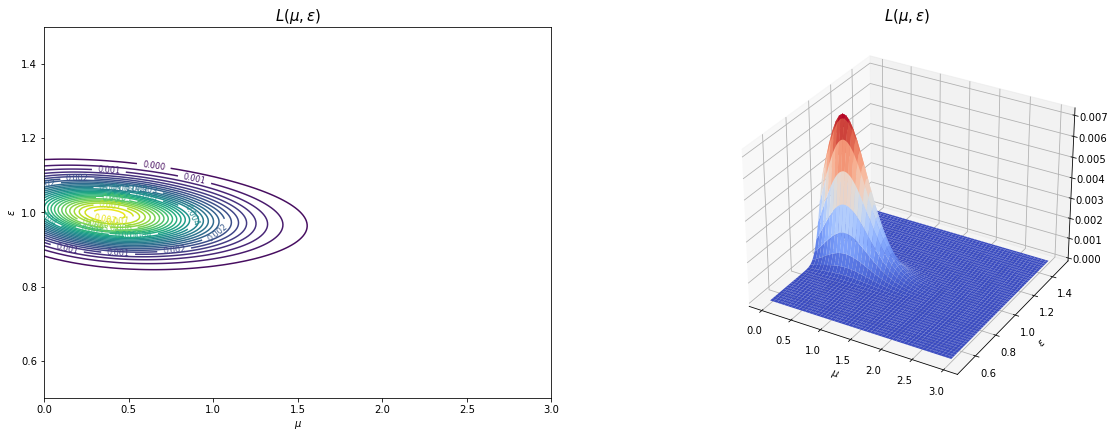

In [2]:
def likelihood(mu_, sigma_, epsilon_, n_, b_ , s_):
    
    poisson = (1/math.factorial(n_))*((mu_*s_ + epsilon_*b_)**n_)*np.exp(-(mu_*s_ + epsilon_*b_))
    gauss = 1/np.sqrt(2*np.pi*(sigma_**2))*np.exp(-(epsilon_-1)**2/(2*(sigma_**2)))
    
    return poisson*gauss

likelihood = np.vectorize(likelihood)
def TotalLikelihood(mu_, sigma_, epsilon_, Data_, Bkg_, Signal_ ):
    
    LikelihoodTotal = 1
    for i in range(len(Data_)):
        Li =likelihood (mu_, sigma_, epsilon_, Data_[i], Bkg_[i], Signal_[i])
        LikelihoodTotal *= Li
        
    return LikelihoodTotal

Data = np.array([10.0,20.0,5.0], dtype=float)
Bkg = np.array([6.0,15.0,10.0], dtype=float)
Signal = np.array([2.0,10.0,3.0], dtype=float)
sigma = 0.1

mu_ = np.linspace(0,3,200)
epsilon_ = np.linspace(0.5,1.5,200)
mu, epsilon = np.meshgrid(mu_,epsilon_)
LikelihoodCanales = TotalLikelihood(mu, sigma, epsilon, Data, Bkg, Signal)


fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(221)
c = ax.contour(mu, epsilon,LikelihoodCanales ,30)
ax.clabel(c, inline=1, fontsize=8)
ax.set_xlabel('$\mu$')
ax.set_ylabel('$\epsilon$')
ax.set_title(r"$L(\mu, \epsilon)$", fontsize = 15)

ax1 = fig.add_subplot(222, projection='3d')
surf = ax1.plot_surface(mu, epsilon,LikelihoodCanales , cmap=cm.coolwarm ,linewidth=0.01, antialiased=True)
ax1.set_xlabel('$\mu$')
ax1.set_ylabel('$\epsilon$')
ax1.set_title(r"$L(\mu, \epsilon)$", fontsize = 15 )
plt.show()

In [3]:
def Metropolis(mu0_,epsilon0_,sigma_, Data_, Bkg_, Signal_ ,WidthSteps, NSteps):
    
    mcmc_steps = []
    
    burn_steps = 5000
    
    for i in tqdm(range(NSteps)):
        
        P0 = TotalLikelihood(mu0_, sigma_, epsilon0_, Data_, Bkg_,Signal_)
        
        mun_ = mu0_ + WidthSteps*2.*(np.random.rand()-0.5)
        epsilonn_ = epsilon0_ + WidthSteps*2.*(np.random.rand()-0.5)
        
        if mun_  < 0:
            mun_ *= -1
            
        Pn = TotalLikelihood(mun_, sigma_, epsilonn_, Data_, Bkg_, Signal_)
        
        alpha = Pn/P0
        beta = np.random.rand()
        
        if np.minimum(1, alpha > beta):
                
            mu0_ = mun_
            epsilon0_ = epsilonn_
                
        if (i >= burn_steps):
            mcmc_steps.append([mu0_,epsilon0_]) 
        
        else:
            if (i >= burn_steps):
                mcmc_steps.append([mu0_,epsilon0_])  
    
    
    mcmc_steps = np.array(mcmc_steps)
    return mcmc_steps

NSteps = int(1e5)
mcmc = Metropolis(1.5,0.75,sigma, Data, Bkg, Signal, 0.1,NSteps)

100%|██████████| 100000/100000 [01:00<00:00, 1653.72it/s]


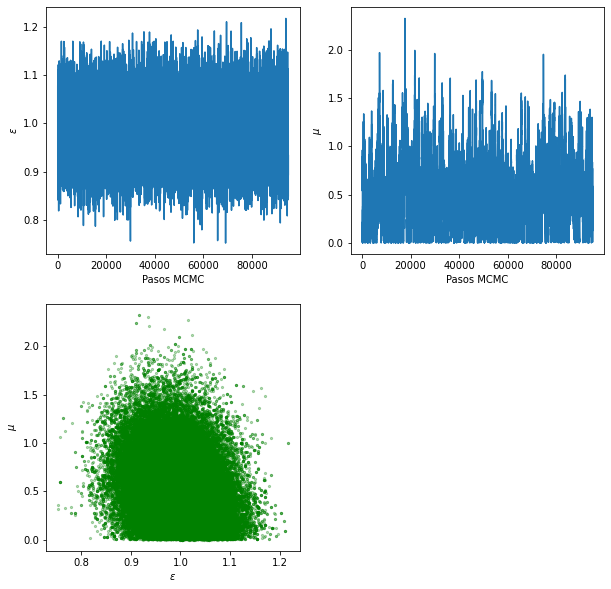

In [4]:
Mu = mcmc[:,0]
Epsilon = mcmc[:,1]
fig = plt.figure( figsize=(10,10))

ax1 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,1)

ax1.plot(Mu)
ax1.set_xlabel("Pasos MCMC")
ax1.set_ylabel(r'$\mu$')

ax3.scatter(Epsilon, Mu, c='g',marker='o', s=5, alpha=0.3)
ax3.set_ylabel(r'$\mu$')
ax3.set_xlabel(r'$\epsilon$')

ax4.plot(Epsilon)
ax4.set_xlabel("Pasos MCMC")
ax4.set_ylabel(r'$\epsilon$')
plt.show()

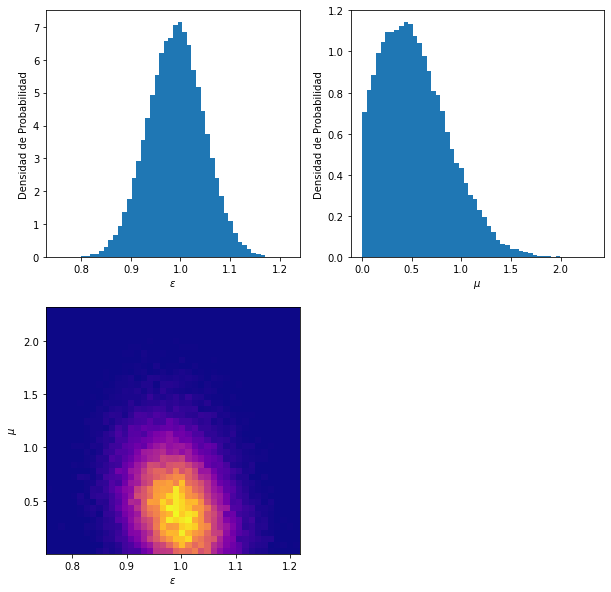

In [5]:
fig = plt.figure( figsize=(10,10))

ax1 = fig.add_subplot(2,2,1)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,2)

ax1.hist(Epsilon, 50, density=True)
ax1.set_ylabel('Densidad de Probabilidad')
ax1.set_xlabel(r'$\epsilon$')

ax3.hist2d(Epsilon, Mu, bins=40,  cmap='plasma')
ax3.set_xlabel(r'$\epsilon$')
ax3.set_ylabel(r'$\mu$')

ax4.hist(Mu, 50, density=True)
ax4.set_ylabel('Densidad de Probabilidad')
ax4.set_xlabel(r'$\mu$')
plt.show()

In [6]:
mean=np.percentile(mcmc[:,0],50)
sigma1 = np.percentile(mcmc[:,0], 16.)
sigma2 = np.percentile(mcmc[:,0], 84.)
display(Latex(r'$\hat{\mu} = '+str(mean)+'_{-' + str(mean-sigma1)+'}'+'^{+'+str(sigma2-mean)+'}$'))

mean=np.percentile(mcmc[:,1],50)
sigma1 = np.percentile(mcmc[:,1], 16.)
sigma2 = np.percentile(mcmc[:,1], 84.)
display(Latex(r'$\hat{\epsilon} = '+str(mean)+'_{-' + str(mean-sigma1)+'}'+'^{+'+str(sigma2-mean)+'}$'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

b)Si $\mu$ es cercano a cero indica que los datos están bien descritos por la hipótesis de no existencia extraterrestre. Por el contrario, si $\mu$ se acerca a uno podría indicar que existe vida extraterrestre. ¿Qué conclusiones reportaría usted sobre la observación realizada?

Tomando en cuenta que el valor encontrado de $\hat{\mu} \approx 0.5 $, realmente no se puede afirmar algo con total certeza en relación a la existencia de vida extraterrestre. Esto nos indica que si bien los modelos que se rigen bajo la hipótesis de no existencia extraterreste describen de "buen" manera los datos observados, aquellos que admiten la hipótesis contraria también tienen un buen comportamiento respecto a estos datos, es decir, la prueba realizada anteriormente no es totalmente conclusiva. Cabe notar, que el error asociado a la estimación de $\hat{\mu}$ es alto, lo cual concuerda en parte con nuestra conclusión reportada.

In [7]:
# De manera analítica el valor de la varialbe "suma" debe ser aproximadamente cero.
# Así, reemplazando con nuestros valores:

S = sum(Signal)
B = sum(Bkg)
Mu=np.percentile(mcmc[:,0],50)
Epsilon = np.percentile(mcmc[:,1],50)
suma = 0
for i in range(3):
    suma += Data[i]*(Signal[i]+Bkg[i])/(Mu*Signal[i] + Epsilon*Bkg[i])
suma += -S-B
suma += - 3*(Epsilon-1)/((sigma**2))
print (suma)

-0.8649430051423184


## 2. MonteCarlo Integration
**1.** Usando el método de MonteCarlo estime esta integral con tres cifras de precisión.

In [8]:
#2. La siguiente integral multidimensional:
def f(x):
    suma = sum(x)
    return suma**2

def IntegralMC1(Npoints_ = int(1e4), d = 8):
    X = []
    for i in range(d):
        X.append(np.random.rand(Npoints_))
        
    F= f(X)
    return np.average(F)/(2**(d-1))

Npoints = 1e5
d = 8
MCI = IntegralMC1(int(Npoints),d)
IntegralReal = 25/192

display(Latex('Valor estimado de la integral: ' + r'$I_{estimated} =$'+str(MCI) ) )
display(Latex('Valor teórico de la integral: ' + r'$I_{exact} =$'+str(IntegralReal) ) )

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>